In [18]:
from grosspita import GrossPitaevskiiProblem
import csv

# Section a0)

Check that if no interaction is considered, the simulation returns the expected results of the harmonic oscil·lator.

In [19]:
section_a0 = GrossPitaevskiiProblem(
                                    particle_number=1000000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=False
                                    )

In [20]:
chemical_potential_section_a0 = section_a0.evolution()

100%|██████████| 20000/20000 [00:25<00:00, 795.44it/s]


In [21]:
energy_section_a0 = section_a0.energy

In [22]:
print("e=",f"{energy_section_a0:.2f}","\n","mu=",f"{chemical_potential_section_a0:.2f}")

e= 1.50 
 mu= 1.50


# Section a)

Study of the energies versus the number of particles

In [23]:
number_of_particles_list = [100,1000,10000,100000,1000000]
with open("a.csv","w") as file:
    writer = csv.writer(file)
    writer.writerow(["N","mu","e_kin","e_trap","e_int","e"])
    for number_of_particles in number_of_particles_list:
        print(f"Starting calculation for {number_of_particles} particles")
        section_a = GrossPitaevskiiProblem(
                                    particle_number=number_of_particles,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
        
        chemical_potential_section_a = section_a.evolution()

        kinetic_energy_section_a = section_a.kinetic_term
        trap_energy_section_a = section_a.trap_term
        interaction_energy_section_a = section_a.interaction_term
        energy_section_a = section_a.energy


        writer.writerow([number_of_particles,
                        chemical_potential_section_a,
                        kinetic_energy_section_a,
                        trap_energy_section_a,
                        interaction_energy_section_a,
                        energy_section_a])
        

Starting calculation for 100 particles


100%|██████████| 20000/20000 [00:24<00:00, 808.51it/s]


Starting calculation for 1000 particles


100%|██████████| 20000/20000 [00:24<00:00, 803.55it/s]


Starting calculation for 10000 particles


100%|██████████| 20000/20000 [00:24<00:00, 807.33it/s]


Starting calculation for 100000 particles


100%|██████████| 20000/20000 [00:24<00:00, 808.36it/s]


Starting calculation for 1000000 particles


100%|██████████| 20000/20000 [00:24<00:00, 811.21it/s]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("a.csv")
for column in df.columns[1:]:
    df[column] = round(df[column],2)

In [25]:
df.head()

,N,mu,e_kin,e_trap,e_int,e
0,100,1.79,0.65,0.87,0.13,1.65
1,1000,3.04,0.44,1.37,0.62,2.42
2,10000,6.87,0.24,2.98,1.82,5.04
3,100000,16.85,0.12,7.24,4.74,12.10
4,1000000,42.12,0.06,18.05,12.00,30.12


In [26]:
df.to_latex("a.tex",index=False)

# Section b)

Study of the energies versus the number of particles in the Thomas-Fermi approximation

In [27]:
number_of_particles_list = [100,1000,10000,100000,1000000]
with open("b.csv","w") as file:
    writer = csv.writer(file)
    writer.writerow(["N","mu","e_kin","e_trap","e_int","e"])
    for number_of_particles in number_of_particles_list:
        print(f"Starting calculation for {number_of_particles} particles")
        section_a = GrossPitaevskiiProblem(
                                    particle_number=number_of_particles,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=50000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )
        
        chemical_potential_section_a = section_a.evolution()

        kinetic_energy_section_a = section_a.kinetic_term
        trap_energy_section_a = section_a.trap_term
        interaction_energy_section_a = section_a.interaction_term
        energy_section_a = section_a.energy


        writer.writerow([number_of_particles,
                        chemical_potential_section_a,
                        kinetic_energy_section_a,
                        trap_energy_section_a,
                        interaction_energy_section_a,
                        energy_section_a])

Starting calculation for 100 particles


100%|██████████| 50000/50000 [01:01<00:00, 815.09it/s]


Starting calculation for 1000 particles


100%|██████████| 50000/50000 [01:00<00:00, 822.40it/s]


Starting calculation for 10000 particles


100%|██████████| 50000/50000 [01:00<00:00, 820.06it/s]


Starting calculation for 100000 particles


100%|██████████| 50000/50000 [01:01<00:00, 818.78it/s]


Starting calculation for 1000000 particles


100%|██████████| 50000/50000 [01:01<00:00, 810.08it/s]


In [28]:
df2 = pd.read_csv("b.csv")
for column in df.columns[1:]:
    df2[column] = round(df2[column],2)
df2.head()

,N,mu,e_kin,e_trap,e_int,e
0,100,1.04,0.0,0.47,0.29,0.76
1,1000,2.65,0.0,1.15,0.75,1.90
2,10000,6.66,0.0,2.86,1.90,4.76
3,100000,16.75,0.0,7.18,4.78,11.96
4,1000000,42.08,0.0,18.03,12.03,30.05


In [29]:
df2.to_latex("b.tex",index=False)

# Section c)

Density profile with N=1000 and N=100000, for the GP and TF approximations

In [30]:
section_c1 = GrossPitaevskiiProblem(
                                    particle_number=1000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
section_c1t = GrossPitaevskiiProblem(
                                    particle_number=1000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )
section_c2 = GrossPitaevskiiProblem(
                                    particle_number=100000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
section_c2t = GrossPitaevskiiProblem(
                                    particle_number=100000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )

In [31]:
chemical_potential_section_c1 = section_c1.evolution()
chemical_potential_section_c1t = section_c1t.evolution()
chemical_potential_section_c2 = section_c2.evolution()
chemical_potential_section_c2t = section_c2t.evolution()

100%|██████████| 20000/20000 [00:25<00:00, 790.99it/s]


In [32]:
density_c1=section_c1.density
density_c1t=section_c1t.density
density_c2=section_c2.density
density_c2t=section_c2t.density

In [33]:
with open("d.csv","w") as file:
    writer = csv.writer(file)
    for i in range(len(density_c1)):
        writer.writerow([density_c1[i],density_c2[i],density_c1t[i],density_c2t[i]])
        
x = section_c1.discreted_r[1:]

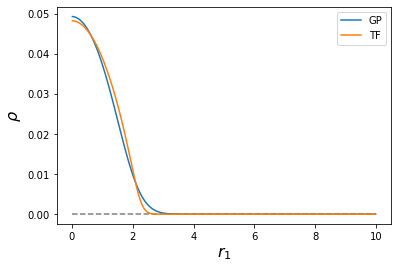

In [34]:
import matplotlib.pyplot as plt
plt.plot(x,density_c1,label='GP')
plt.plot(x,density_c1t,label='TF')
plt.legend()
plt.hlines(0,xmin=0,xmax=10, linestyles='dashed', colors='grey')
plt.xlabel('$r_{1}$',fontsize=16)
plt.ylabel(r"$\rho$",fontsize=16)
plt.rc("axes",labelsize=16)
plt.savefig('N1.png',bbox_inches='tight')
plt.show()

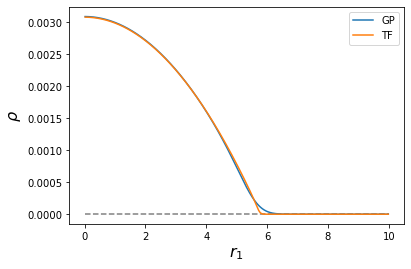

In [35]:
plt.plot(x,density_c2,label='GP')
plt.plot(x,density_c2t,label='TF')
plt.legend()
plt.hlines(0,xmin=0,xmax=10, linestyles='dashed', colors='grey')
plt.xlabel('$r_1$',fontsize=16)
plt.ylabel(r"$\rho$",fontsize=16)
plt.rc("axes",labelsize=16)
plt.savefig('N10.png',bbox_inches='tight')
plt.show()

# Section d)

Numerical study of the Virial theorem

In [40]:
with open("d.csv","w") as file:
    writer = csv.writer(file)
    for number_of_particles in number_of_particles_list:
        print(f"Starting calculation for {number_of_particles} particles")
        section_d = GrossPitaevskiiProblem(
                                particle_number=number_of_particles,
                                grid_size=10, 
                                grid_step=0.02, 
                                scattering_length=0.00433, 
                                sigma=0.5, 
                                time_step = 0.0001, 
                                iterations=50000, 
                                thomas_fermi=True,
                                interacting_system=True
                                )
        section_d.evolution()
        writer.writerow([number_of_particles,section_d.virial])


Starting calculation for 100 particles


100%|██████████| 50000/50000 [01:05<00:00, 763.43it/s]


Starting calculation for 1000 particles


100%|██████████| 50000/50000 [01:07<00:00, 739.63it/s]


Starting calculation for 10000 particles


100%|██████████| 50000/50000 [01:04<00:00, 780.77it/s]


Starting calculation for 100000 particles


100%|██████████| 50000/50000 [01:04<00:00, 769.42it/s]


Starting calculation for 1000000 particles


100%|██████████| 50000/50000 [01:05<00:00, 762.26it/s]


In [46]:
virial_df = pd.read_csv("d.csv", names=["N","virial"])
virial_df.head()

,N,virial
0,100,-0.085593
1,1000,-0.044758
2,10000,-0.021273
3,100000,-0.004560
4,1000000,0.024943
